In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
file_path = '/content/drive/MyDrive/dataset.csv'
df = pd.read_csv(file_path)
#!ls '/content/drive/My Drive/'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df.fillna(df.mean(numeric_only = True), inplace = True)

label_encoder = LabelEncoder()
df['District'] = label_encoder.fit_transform(df['District'])

X = df.drop(columns = ['Year'])
Y = df[['Year']]



In [ ]:
print(df.dtypes)

District            int64
Year                int64
Temperature_1     float64
Temperature_2     float64
Temperature_3     float64
Temperature_4     float64
Temperature_5     float64
Temperature_6     float64
Temperature_7     float64
Temperature_8     float64
Temperature_9     float64
Temperature_10    float64
Temperature_11    float64
Temperature_12    float64
Rainfall_1        float64
Rainfall_2        float64
Rainfall_3        float64
Rainfall_4        float64
Rainfall_5        float64
Rainfall_6        float64
Rainfall_7        float64
Rainfall_8        float64
Rainfall_9        float64
Rainfall_10       float64
Rainfall_11       float64
Rainfall_12       float64
Humidity_1        float64
Humidity_2        float64
Humidity_3        float64
Humidity_4        float64
Humidity_5        float64
Humidity_6        float64
Humidity_7        float64
Humidity_8        float64
Humidity_9        float64
Humidity_10       float64
Humidity_11       float64
Humidity_12       float64
January     



> Add blockquote



In [ ]:
#Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   District        384 non-null    int64  
 1   Year            384 non-null    int64  
 2   Temperature_1   384 non-null    float64
 3   Temperature_2   384 non-null    float64
 4   Temperature_3   384 non-null    float64
 5   Temperature_4   384 non-null    float64
 6   Temperature_5   384 non-null    float64
 7   Temperature_6   384 non-null    float64
 8   Temperature_7   384 non-null    float64
 9   Temperature_8   384 non-null    float64
 10  Temperature_9   384 non-null    float64
 11  Temperature_10  384 non-null    float64
 12  Temperature_11  384 non-null    float64
 13  Temperature_12  384 non-null    float64
 14  Rainfall_1      384 non-null    float64
 15  Rainfall_2      384 non-null    float64
 16  Rainfall_3      384 non-null    float64
 17  Rainfall_4      384 non-null    flo

In [ ]:
model = LinearRegression()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
results = []
for year in Y_test.columns:
  #model.fit(X_train, Y_train[year])
  #Y_pred = model.predict(X_test)
  actual = Y_test[year]
  model.fit(X_train, actual)
  Y_pred = model.predict(X_test)

  #mae = mean_absolute_error(Y_test[year], Y_pred)
  #mse = mean_squared_error(Y_test[year], Y_pred)
  #r2 = r2_score(Y_test[year], Y_pred)

  mae = mean_absolute_error(actual, predicted)
  mse = mean_squared_error(actual, predicted)
  r2 = r2_score(actual, predicted)

  #results.append({
  results[year] = {
          "Model" : "Linear Regression",
          "Year" : year,
          "MAE" : mae,
          "MSE" : mse,
          "R2" : r2
      }
               # "Model" : "Linear Regression",
                #"Year" : year,
                #"MAE" : mae,
                #"MSE" : mse,
                #"R2" : r2
  #})

  for year, metrics in results.items():
    print(f"Year: {year}")
    print(f"MAE: {metrics['MAE']:.2f}")
    print(f"  MSE: {metrics['MSE']:.2f}")
    print(f"  R2: {metrics['R2']:.2f}")
    print()


ValueError: Found input variables with inconsistent numbers of samples: [307, 77]

In [ ]:
results_df = pd.DataFrame(results)
print("Model Performance Results:")
print(results_df)

Model Performance Results:
Empty DataFrame
Columns: []
Index: []


In [ ]:
import matplotlib.pyplot as plt

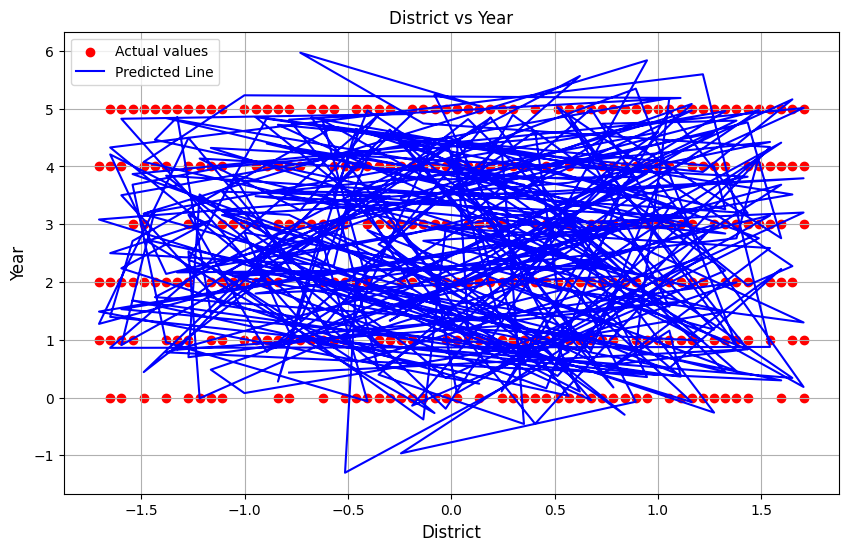

In [ ]:
plt.figure(figsize = (10, 6))
plt.scatter(X_train[:, 0], Y_train, color = 'red', label = 'Actual values')
plt.plot(X_train[:, 0], model.predict(X_train), color = 'blue', label = 'Predicted Line')
plt.title('District vs Year')
plt.xlabel('District', fontsize = 12)
plt.ylabel('Year', fontsize = 12)
plt.legend()
plt.grid()
plt.show()